# 获取数据

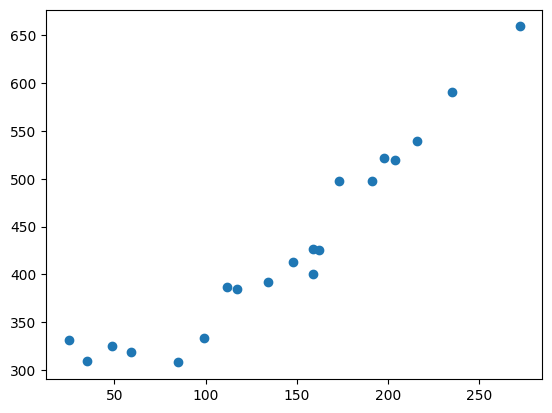

In [1]:
import numpy as np
import matplotlib.pyplot as plt

train = np.loadtxt('data/click.csv', delimiter=',', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

plt.plot(train_x, train_y, 'o')
plt.show()

# 线性回归

作为一次函数实现

假设函数：$f_\theta(x)=\theta_0 + \theta_1x$

目标函数：$E(\theta)=\frac{1}{2}\sum_{i=1}^n(y^{(i)} - f_\theta(x^{(i)}))^2$


## 定义预测函数和目标函数

同时随机初始化参数

In [2]:
theta0 = np.random.rand()
theta1 = np.random.rand()

# 预测函数
def f(x):
    return theta0 + theta1 * x

# 目标函数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

## 训练数据标准化

In [3]:
# 标准化
mu = train_x.mean()
sigma = train_x.std()

def standardize(x):
    return (x-mu) / sigma

train_z = standardize(train_x)

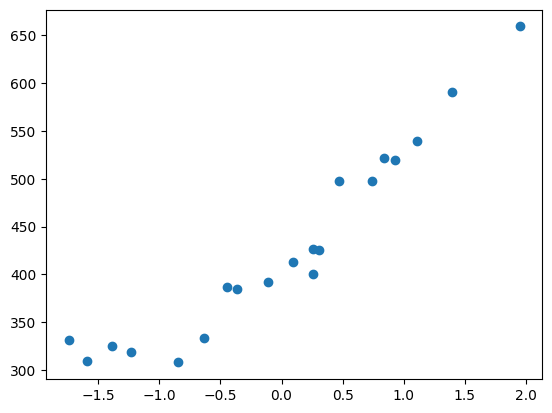

In [4]:
plt.plot(train_z, train_y, 'o')

## 梯度下降法更新参数

$\theta_0 := \theta_0 - \eta\sum_{i=1}^n(f_\theta(x^{(i)}) - y^{(i)})x^{(i)}$

$\theta_1 := \theta_1 - \eta\sum_{i=1}^n(f_\theta(x^{(i)}) - y^{(i)})x^{(i)}$

In [5]:
# 学习率
ETA = 1e-3

# 误差的差值
diff = 1

# 更新次数
count = 0

# 梯度下降
error = E(train_z, train_y)
while diff > 1e-2:
    # 更新结果保存到临时变量
    tmp0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)

    # 更新参数
    theta0 = tmp0
    theta1 = tmp1

    # 计算与上一次误差的差值
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error

    # 输出日志
    count += 1
    log = '第{}次：theta0 = {:.3f}, theta1 = {:.3f}, 差值 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))

第1次：theta0 = 8.755, theta1 = 2.431, 差值 = 76289.7841
第2次：theta0 = 17.163, theta1 = 4.252, 差值 = 73268.7086
第3次：theta0 = 25.402, theta1 = 6.036, 差值 = 70367.2678
第4次：theta0 = 33.477, theta1 = 7.785, 差值 = 67580.7240
第5次：theta0 = 41.391, theta1 = 9.499, 差值 = 64904.5273
第6次：theta0 = 49.146, theta1 = 11.179, 差值 = 62334.3080
第7次：theta0 = 56.746, theta1 = 12.825, 差值 = 59865.8694
第8次：theta0 = 64.194, theta1 = 14.438, 差值 = 57495.1810
第9次：theta0 = 71.493, theta1 = 16.019, 差值 = 55218.3718
第10次：theta0 = 78.646, theta1 = 17.568, 差值 = 53031.7243
第11次：theta0 = 85.656, theta1 = 19.086, 差值 = 50931.6680
第12次：theta0 = 92.526, theta1 = 20.574, 差值 = 48914.7740
第13次：theta0 = 99.259, theta1 = 22.032, 差值 = 46977.7489
第14次：theta0 = 105.857, theta1 = 23.461, 差值 = 45117.4301
第15次：theta0 = 112.322, theta1 = 24.861, 差值 = 43330.7798
第16次：theta0 = 118.659, theta1 = 26.234, 差值 = 41614.8810
第17次：theta0 = 124.869, theta1 = 27.579, 差值 = 39966.9317
第18次：theta0 = 130.954, theta1 = 28.897, 差值 = 38384.2412
第19次：theta0 = 136.91

## 确认结果

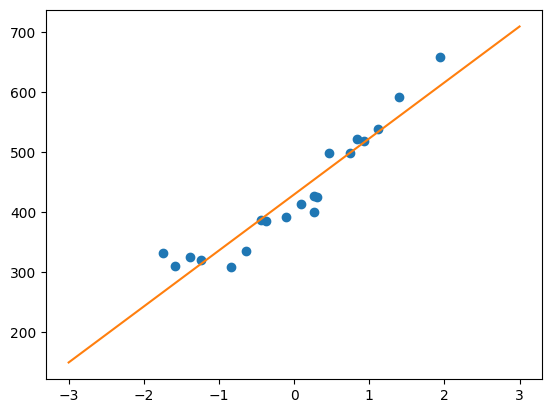

In [6]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()

## 预测

In [7]:
f(standardize(100))

370.9671265460762

# 多项式回归的实现

假设目标函数如下：

$f_\theta(x) = \theta_0 + \theta_1x + \theta_2x^2$

## 定义函数

In [8]:
# 初始化参数
theta = np.random.rand(3)

# 创建训练数据的矩阵
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T

X = to_matrix(train_z)

# 预测函数
def f(x):
    return np.dot(x, theta)

## 梯度下降迭代

In [9]:
diff = 1

error = E(X, train_y)
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - train_y, X)

    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

## 检查拟合的效果

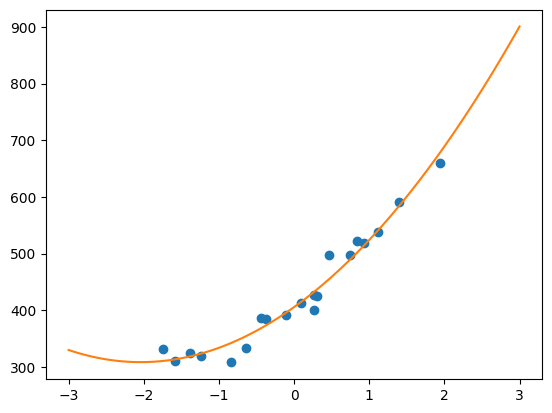

In [10]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()

## 检查迭代的收敛效果

以重复次数为横轴，均方误差为纵轴来绘图，应该还会看到曲线不断下降的样子。

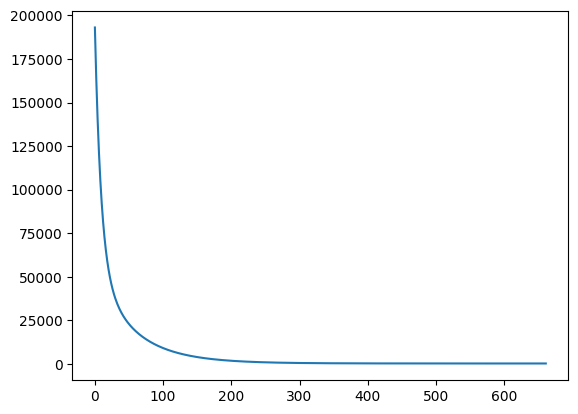

In [11]:
# 均方误差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

# 用随机值初始化参数
theta = np.random.rand(3)

# 均方误差的历史记录
errors = []

# 误差的差值
diff = 1

# 重复学习
errors.append(MSE(X, train_y))
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]

# 绘制误差变化图
x = np.arange(len(errors))

plt.plot(x, errors)
plt.show()

# 随机梯度下降法的实现

In [12]:
# 用随机值初始化参数
theta = np.random.rand(3)

# 均方误差的历史记录
errors = []

# 误差的差值
diff = 1

# 重复学习
errors.append(MSE(X, train_y))
while diff > 1e-2:
    # 为了调整训练数据的顺序，准备随机的序列
    p = np.random.permutation(X.shape[0])

    # 随机取出训练数据，使用随机梯度下降法更新参数
    for x,y in zip(X[p,:], train_y[p]):
        theta = theta - ETA * np.dot(f(x) - y, x)
    
    # 计算误差的收敛情况
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]

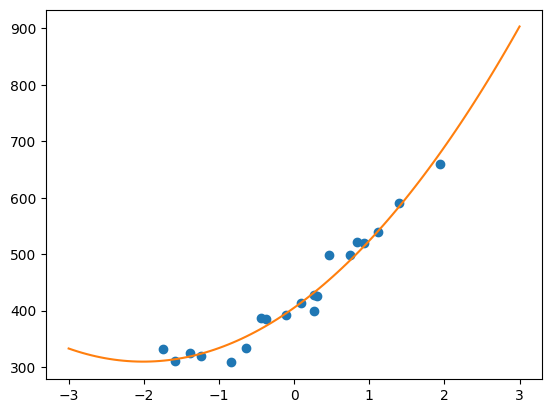

In [13]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()